In [1]:
import json
import os
import torch

import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
ann_path = "/data/SSD/flickr30k/annotations/test.json"
image_path = "/data/SSD/flickr30k/images"
annotations = json.load(open(ann_path))
all_image = [annotations[i]["image"] for i in range(len(annotations))]
all_caption = [annotations[i]["caption"] for i in range(len(annotations))]
all_caption = [item for sublist in all_caption for item in sublist]

In [19]:
indices = 2

top_k_image_path = f"/project/Deep-Clustering/other/retrieval_res/top_k_image_indices_{indices}.pt"
top_k_text_path = f"/project/Deep-Clustering/other/retrieval_res/top_k_text_indices_{indices}.pt"

top_k_image_indices = torch.load(top_k_image_path)
top_k_text_indices = torch.load(top_k_text_path)

A black and white dog is running in a grassy garden surrounded by a white fence.
A Boston Terrier is running on lush green grass in front of a white fence.
A black and white dog is running through the grass.
A dog runs on the green grass near a wooden fence.
A Boston terrier is running in the grass.


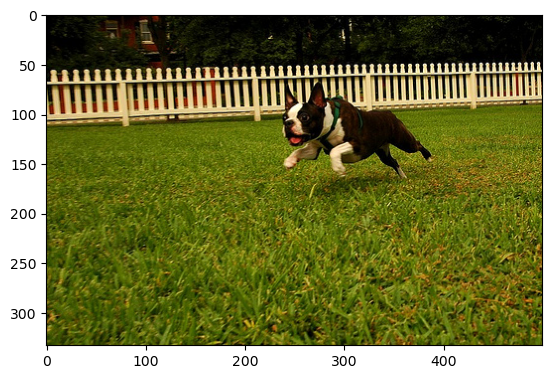

In [23]:
# Original
index = 1
image = all_image[index]
image = Image.open(os.path.join(image_path, image)).convert('RGB')
plt.imshow(image)
caption = annotations[index]['caption']
print(*caption, sep='\n')

In [24]:
# Image-text retrieval

text_ids = top_k_text_indices[index]

caption_retrived = [all_caption[i] for i in text_ids]
print("#####Retrieved top k text#####")
print(*caption_retrived, sep='\n')

# compair captions which are not in caption
caption_new = [caption[i] for cr in caption_retrived for i, cr in enumerate(caption) if cr not in caption]
print("#####New caption#####")
print(*caption_new, sep='\n')

#####Retrieved top k text#####
A Boston terrier is running in the grass.
A Boston Terrier is running on lush green grass in front of a white fence.
A race between friends at the park.
A dog turns on the grass to persue a flying ball.
A dog running with tongue hanging out.
A black and white dog running through an obstacle course
Dogs run at a dog racetrack.
A black and white dog is running in a grassy garden surrounded by a white fence.
Dogs playing
Dogs racing
#####New caption#####



#####Retrieved top k image#####


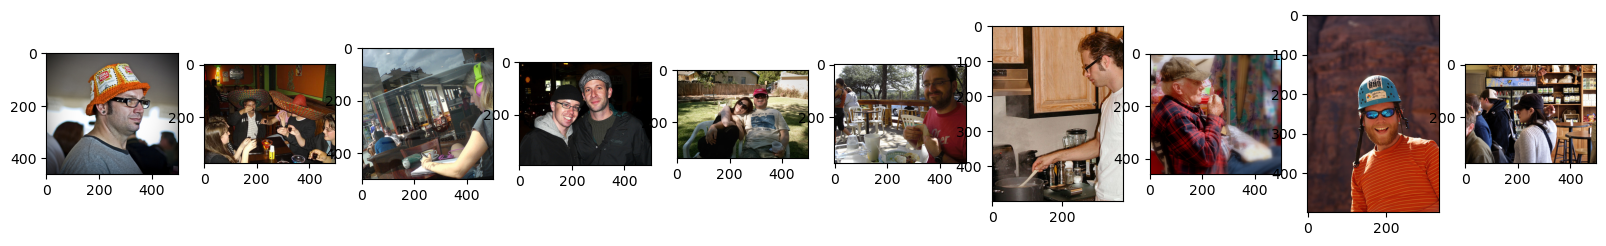

In [25]:
image_ids = top_k_image_indices[index]

image_retrieved = [all_image[i] for i in image_ids]
print("#####Retrieved top k image#####")
plt.figure(figsize=(20, 10))
for i, image in enumerate(image_retrieved):
    image = Image.open(os.path.join(image_path, image)).convert('RGB')
    plt.subplot(1, 10, i + 1)
    plt.imshow(image)